In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dt = pd.read_csv('Train.csv')
display (dt.head())

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
print (dt.shape)

(8523, 12)


In [4]:
display (dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
display (dt.describe())

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [6]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [7]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
for col in cat_col:
    print(col , len(dt[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [12]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**************************************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

In [13]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
display (dt['Item_Weight'].isnull().sum())

1463

In [15]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [16]:
Item_Weight_null['Item_Identifier'].value_counts()

FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: Item_Identifier, Length: 1142, dtype: int64

In [17]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1555 rows x 1 columns]

In [18]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [19]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])

In [20]:
result = dt['Item_Weight'].isnull().sum()
display (result)

0

In [21]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)

Outlet_Size
Outlet_Size             
High                 932
Medium              2793
Small               2388

In [22]:
result= dt['Outlet_Size'].isnull().sum()
display (result)

2410

In [23]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
25             NCD06       13.000          Low Fat         0.099887   
28             FDE51        5.925          Regular         0.161467   
...              ...          ...              ...              ...   
8502           NCH43        8.420          Low Fat         0.070712   
8508           FDW31       11.350          Regular         0.043246   
8509           FDG45        8.100          Low Fat         0.214306   
8514           FDA01       15.000          Regular         0.054489   
8519           FDS36        8.380          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
8              Frozen Foods   96.9726            OUT045   
9              Frozen Foods  187.8214            OUT017   
25                Household   45.9060            OUT017   
28                    Dairy   45.5086            OUT010   
...                     ...       ...               ...   
8502              Household  216.4192            OUT045   
8508  Fruits and Vegetables  199.4742            OUT045   
8509  Fruits and Vegetables  213.9902            OUT010   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
8                          2002         NaN               Tier 2   
9                          2007         NaN               Tier 2   
25                         2007         NaN               Tier 2   
28                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8502                       2002         NaN               Tier 2   
8508                       2002         NaN               Tier 2   
8509                       1998         NaN               Tier 3   
8514                       2002         NaN               Tier 2   
8519                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
3         Grocery Store           732.3800  
8     Supermarket Type1          1076.5986  
9     Supermarket Type1          4710.5350  
25    Supermarket Type1           838.9080  
28        Grocery Store           178.4344  
...                 ...                ...  
8502  Supermarket Type1          3020.0688  
8508  Supermarket Type1          2587.9646  
8509      Grocery Store           424.7804  
8514  Supermarket Type1           468.7232  
8519  Supermarket Type1           549.2850  

[2410 rows x 12 columns]

In [24]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [25]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [26]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [27]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [28]:
miss_bool = dt['Outlet_Size'].isnull()
for i, item in enumerate (dt['Outlet_Size']):
    if miss_bool[i]:
        dt['Outlet_Size'][i] = outlet_size_mode.loc['Outlet_Size',dt['Outlet_Type'][i] ]

In [29]:
display (dt['Outlet_Size'].isnull().sum())

0

In [30]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [31]:
display (sum(dt['Item_Visibility']==0))

526

In [32]:
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

In [33]:
sum(dt['Item_Visibility']==0)

0

In [34]:
display (sum(dt['Item_Visibility']==0))

0

In [35]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [37]:
display (dt['New_Item_Type'].value_counts())

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [38]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [39]:
display (dt['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [40]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [41]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result)

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [42]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [43]:
dt['Outlet_Years'] = 2022 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])

0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Outlet_Years, Length: 8523, dtype: int64


In [44]:
display (dt.head())

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066132   
4           NCD19         8.93       Non-Edible         0.066132   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   New_Item_Type  Outlet_Years  
0  Supermarket Type1          3735.1380            Food            23  
1  Supermarket Type2           443.4228          Drinks            13  
2  Supermarket Type1          2097.2700            Food            23  
3      Grocery Store           732.3800            Food            24  
4  Supermarket Type1           994.7052  Non-Consumable            35

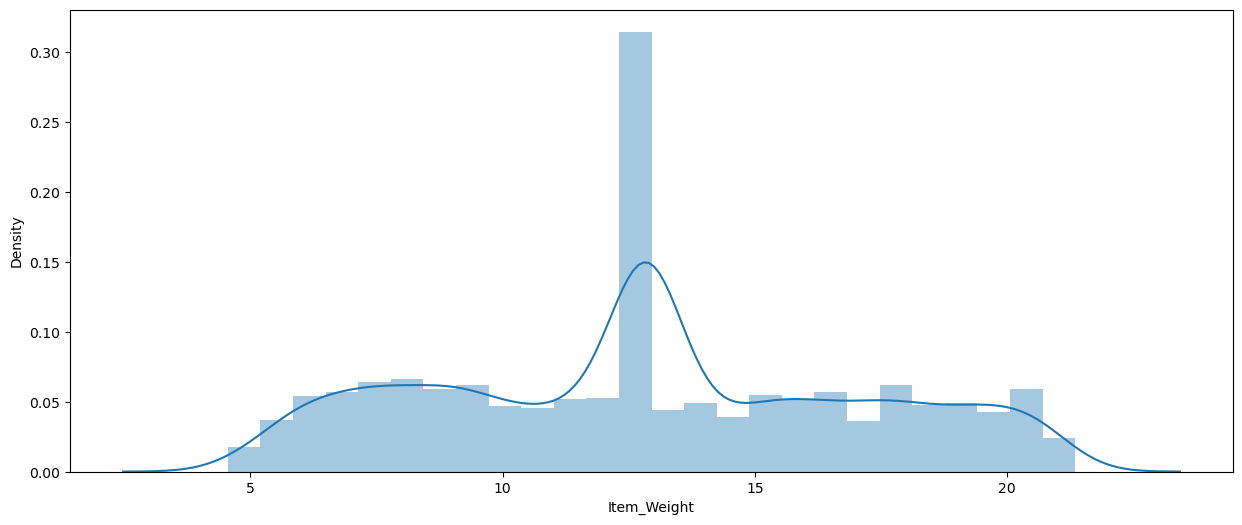

In [45]:
sns.distplot(dt['Item_Weight'])
plt.show()

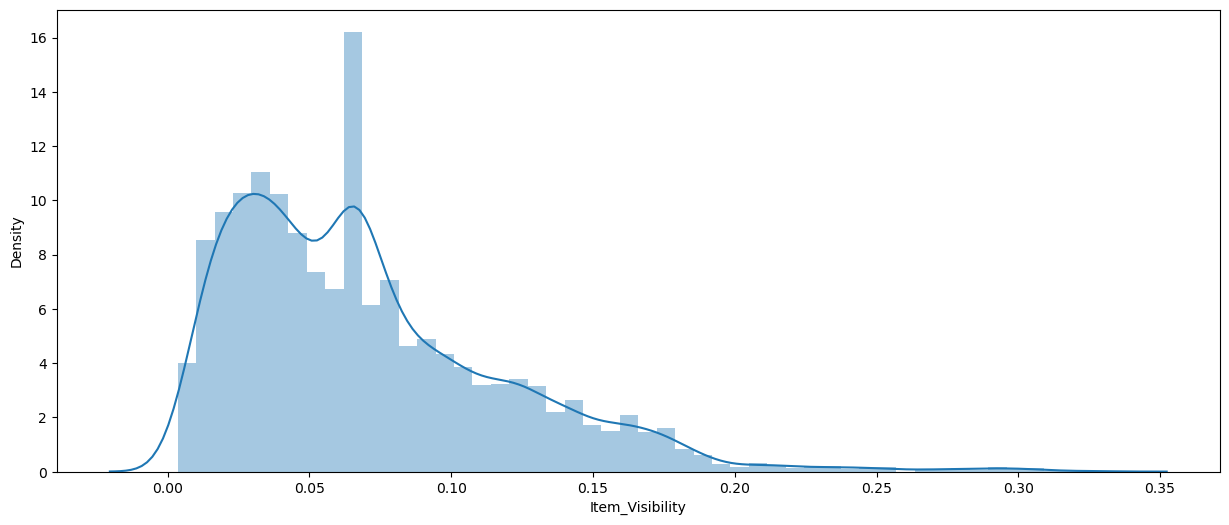

In [46]:
sns.distplot(dt['Item_Visibility'])
plt.show()

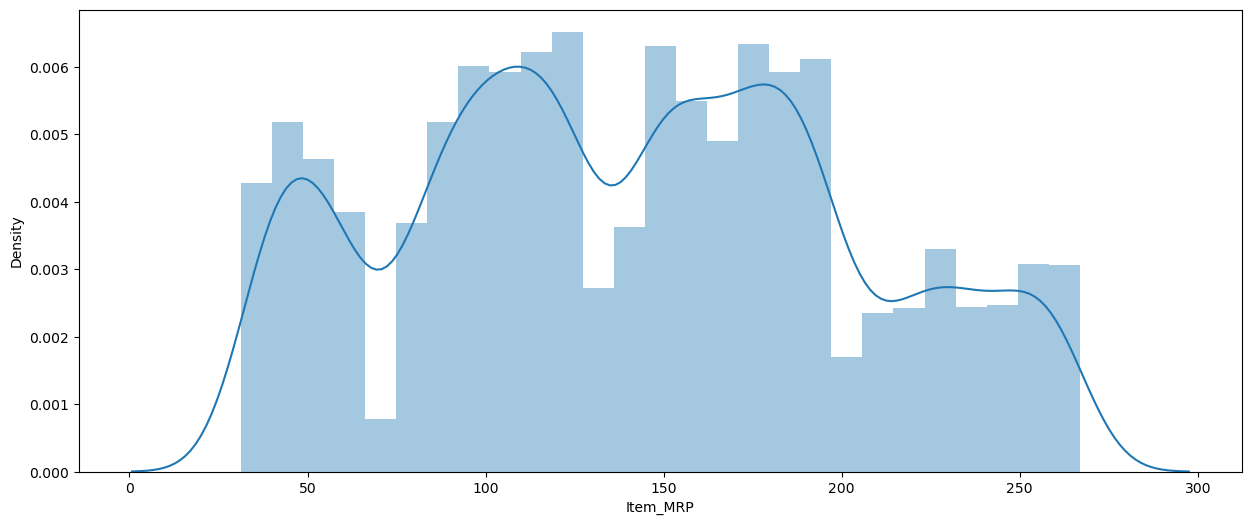

In [47]:
sns.distplot(dt['Item_MRP'])
plt.show()

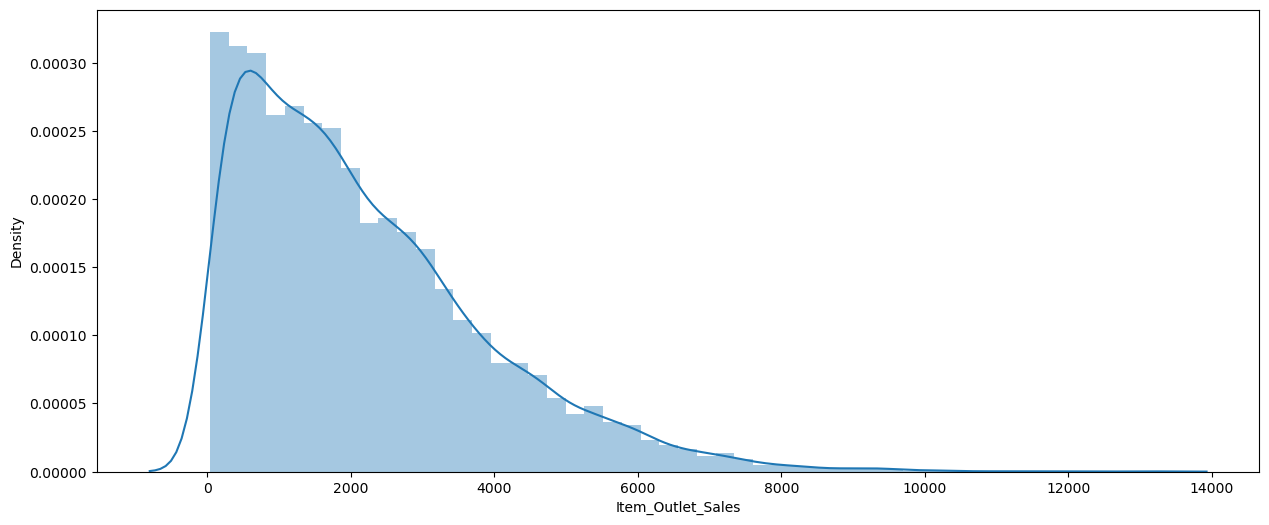

In [48]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

In [49]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

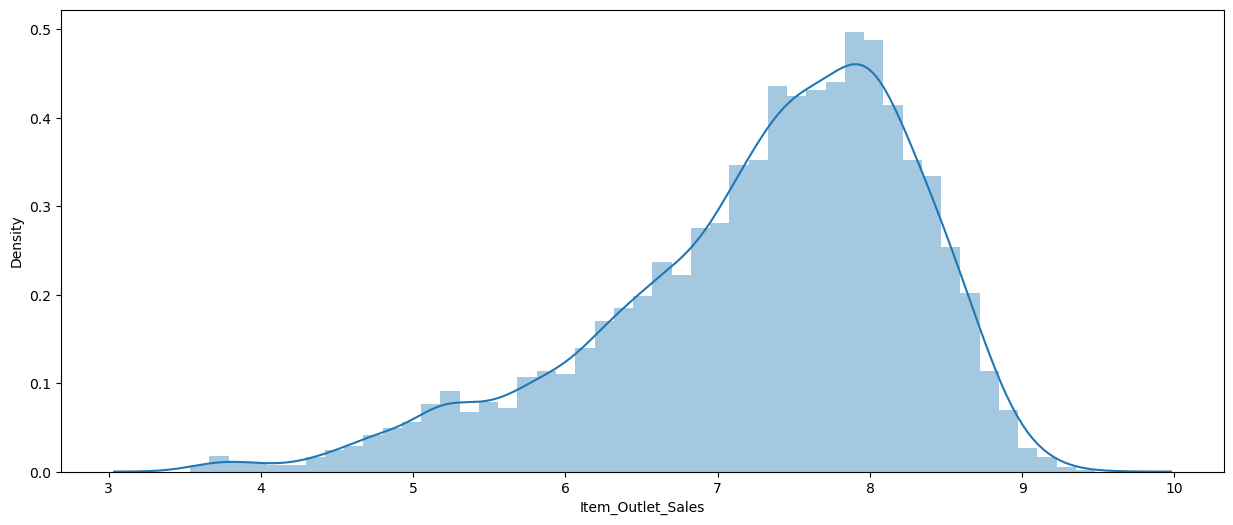

In [50]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

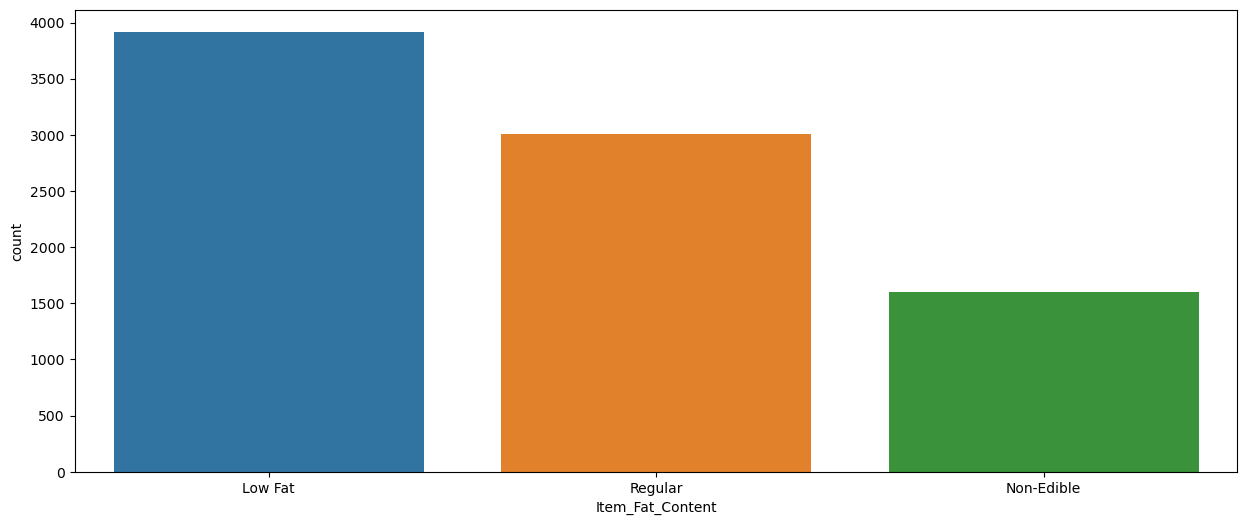

In [51]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()

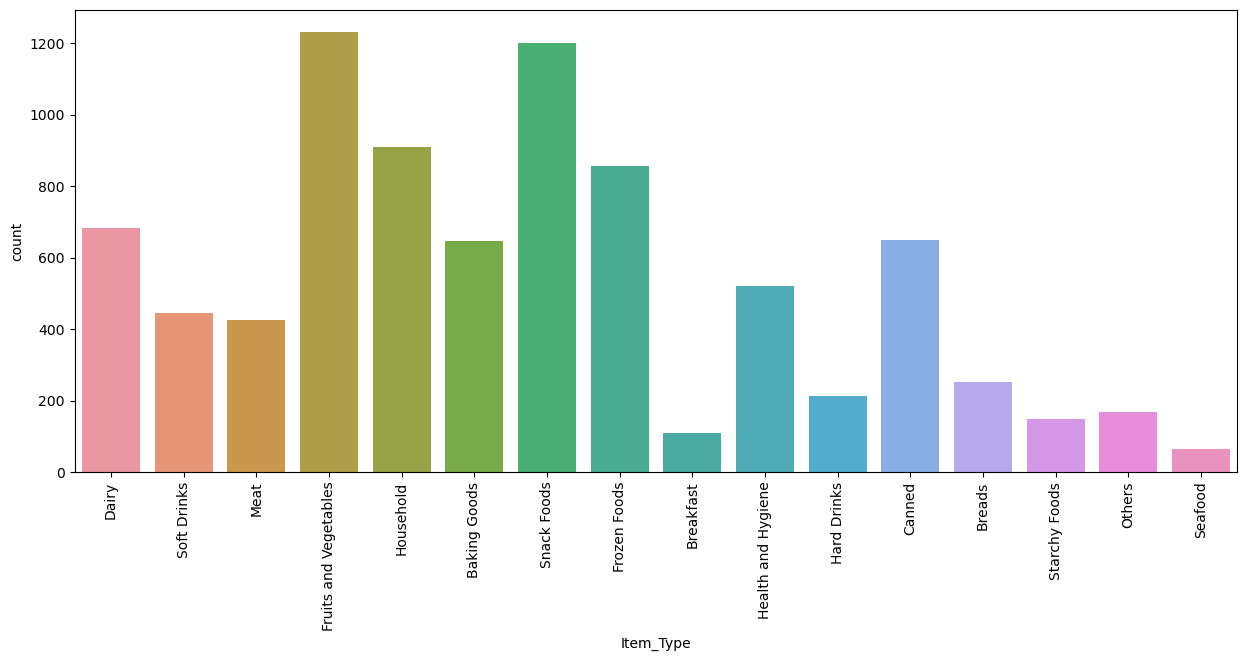

In [52]:
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()

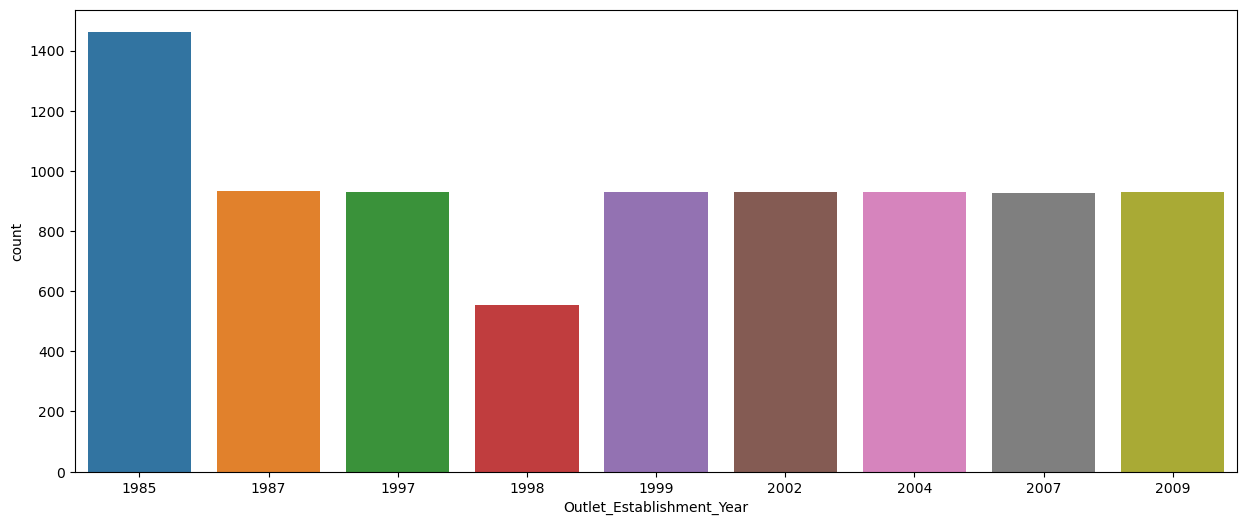

In [53]:
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()

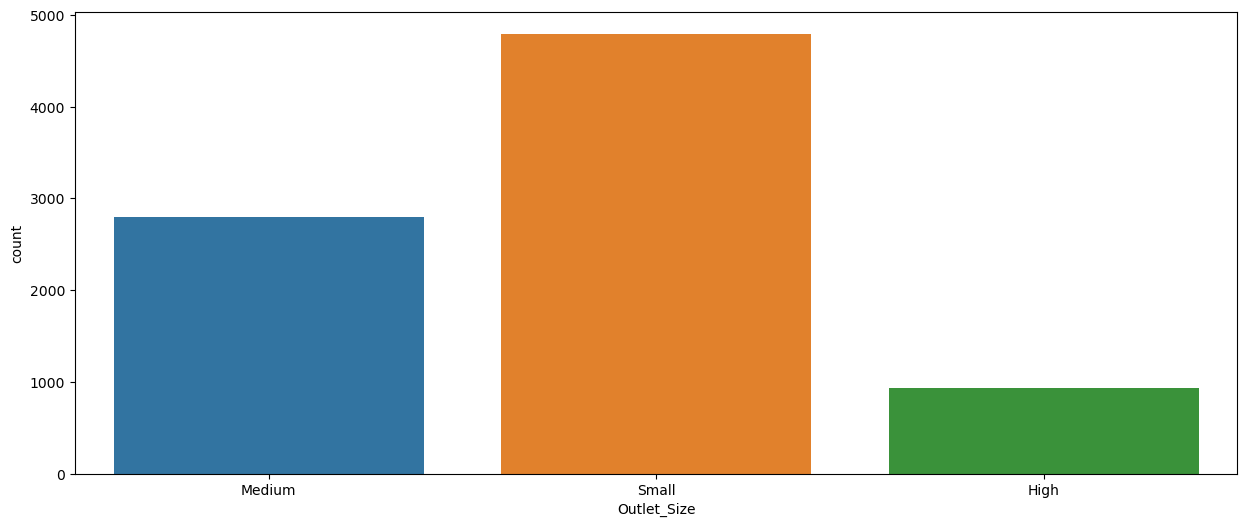

In [54]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()

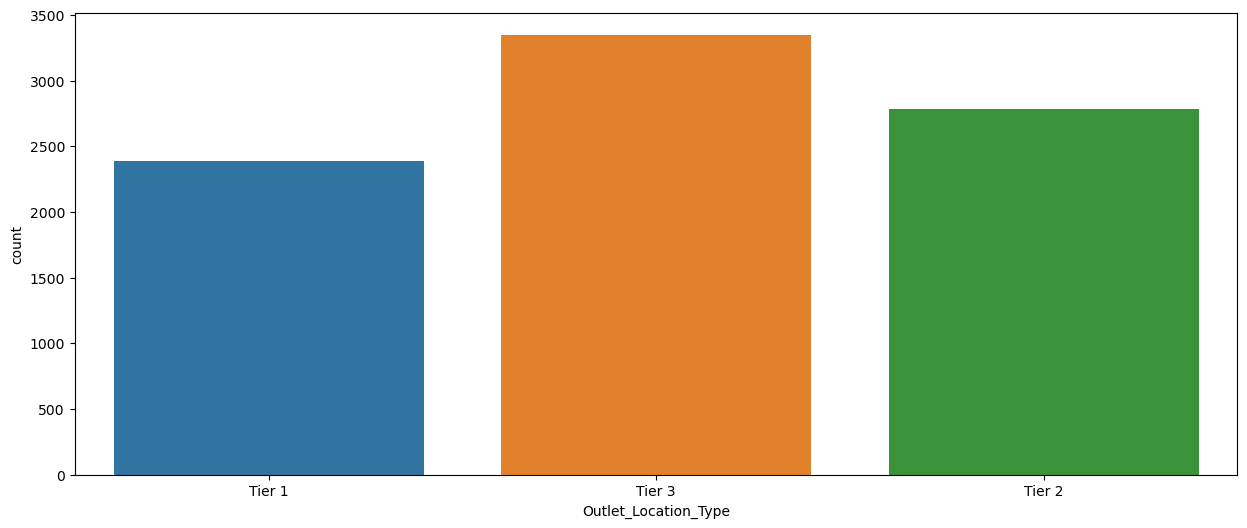

In [55]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()

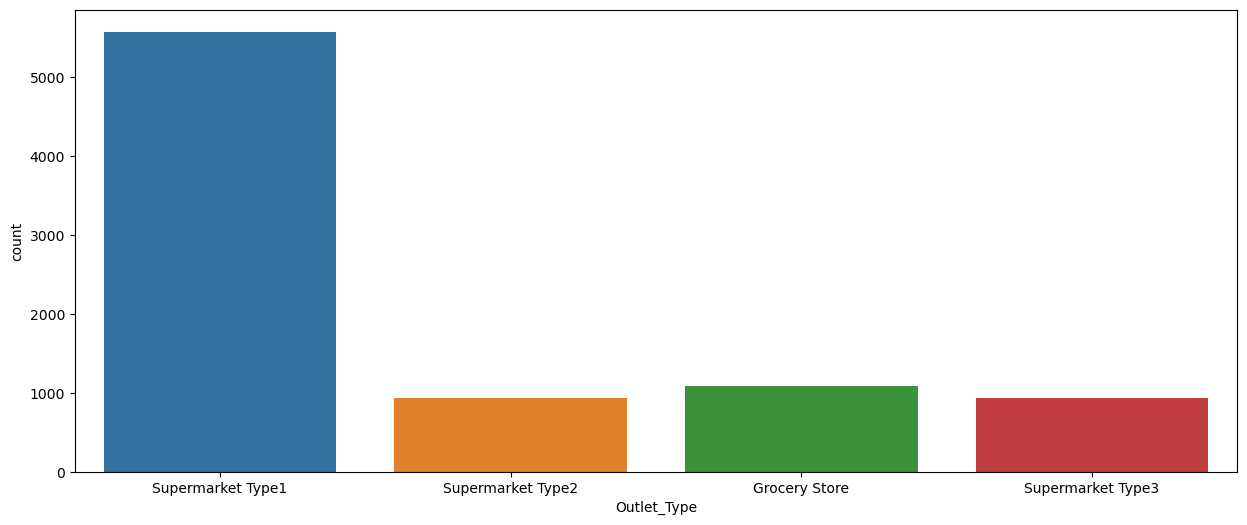

In [56]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()

In [57]:
corr = dt.corr()
display (corr)

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.017450  0.024756   
Item_Visibility              -0.017450         1.000000 -0.005259   
Item_MRP                      0.024756        -0.005259  1.000000   
Outlet_Establishment_Year    -0.008301        -0.078355  0.005020   
Item_Outlet_Sales             0.008059        -0.202466  0.509886   
Outlet_Years                  0.008301         0.078355 -0.005020   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008301           0.008059   
Item_Visibility                            -0.078355          -0.202466   
Item_MRP                                    0.005020           0.509886   
Outlet_Establishment_Year                   1.000000           0.077032   
Item_Outlet_Sales                           0.077032           1.000000   
Outlet_Years                               -1.000000          -0.077032   

                           Outlet_Years  
Item_Weight                    0.008301  
Item_Visibility                0.078355  
Item_MRP                      -0.005020  
Outlet_Establishment_Year     -1.000000  
Item_Outlet_Sales             -0.077032  
Outlet_Years                   1.000000

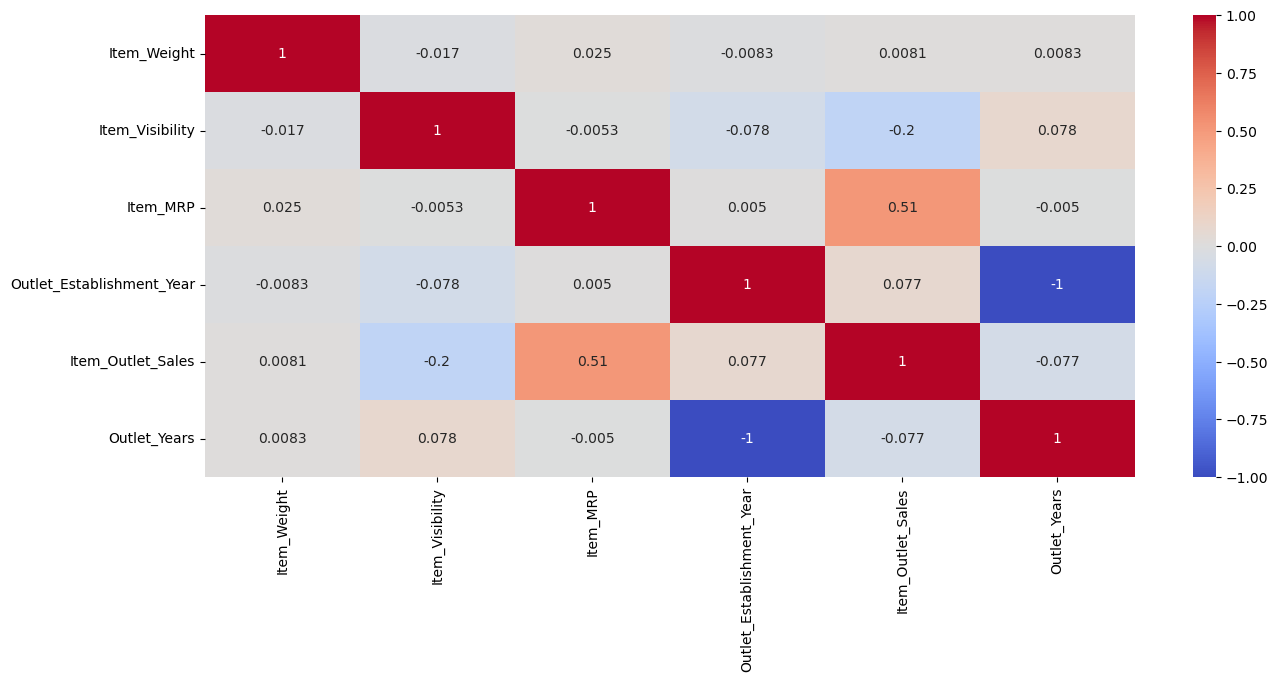

In [58]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [59]:
display (dt.head())

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066132   
4           NCD19         8.93       Non-Edible         0.066132   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   New_Item_Type  Outlet_Years  
0  Supermarket Type1           8.225808            Food            23  
1  Supermarket Type2           6.096776          Drinks            13  
2  Supermarket Type1           7.648868            Food            23  
3      Grocery Store           6.597664            Food            24  
4  Supermarket Type1           6.903451  Non-Consumable            35

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [61]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head())

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 0         0.016047          4   
1           DRC01         5.92                 2         0.019278         14   
2           FDN15        17.50                 0         0.016760         10   
3           FDX07        19.20                 2         0.066132          6   
4           NCD19         8.93                 1         0.066132          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            2   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  New_Item_Type  \
0                     0            1           8.225808              1   
1                     2            2           6.096776              0   
2                     0            1           7.648868              1   
3                     2            0           6.597664              1   
4                     2            1           6.903451              2   

   Outlet_Years  Outlet  
0            23       9  
1            13       3  
2            23       9  
3            24       0  
4            35       1

In [62]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
display (dt.head())

Item_Identifier  Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0           FDA15         9.30         0.016047          4  249.8092   
1           DRC01         5.92         0.019278         14   48.2692   
2           FDN15        17.50         0.016760         10  141.6180   
3           FDX07        19.20         0.066132          6  182.0950   
4           NCD19         8.93         0.066132          9   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0            OUT049                       1999           8.225808   
1            OUT018                       2009           6.096776   
2            OUT049                       1999           7.648868   
3            OUT010                       1998           6.597664   
4            OUT013                       1987           6.903451   

   Outlet_Years  Outlet  ...  Outlet_Location_Type_0  Outlet_Location_Type_1  \
0            23       9  ...                       1                       0   
1            13       3  ...                       0                       0   
2            23       9  ...                       1                       0   
3            24       0  ...                       0                       0   
4            35       1  ...                       0                       0   

   Outlet_Location_Type_2  Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  \
0                       0              0              1              0   
1                       1              0              0              1   
2                       0              0              1              0   
3                       1              1              0              0   
4                       1              0              1              0   

   Outlet_Type_3  New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  
0              0                0                1                0  
1              0                1                0                0  
2              0                0                1                0  
3              0                0                1                0  
4              0                0                0                1  

[5 rows x 26 columns]

In [63]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
X.head()

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Years  Outlet  \
0         9.30         0.016047          4  249.8092            23       9   
1         5.92         0.019278         14   48.2692            13       3   
2        17.50         0.016760         10  141.6180            23       9   
3        19.20         0.066132          6  182.0950            24       0   
4         8.93         0.066132          9   53.8614            35       1   

   Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2  Outlet_Size_0  \
0                   1                   0                   0              0   
1                   0                   0                   1              0   
2                   1                   0                   0              0   
3                   0                   0                   1              0   
4                   0                   1                   0              1   

   ...  Outlet_Location_Type_0  Outlet_Location_Type_1  \
0  ...                       1                       0   
1  ...                       0                       0   
2  ...                       1                       0   
3  ...                       0                       0   
4  ...                       0                       0   

   Outlet_Location_Type_2  Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  \
0                       0              0              1              0   
1                       1              0              0              1   
2                       0              0              1              0   
3                       1              1              0              0   
4                       1              0              1              0   

   Outlet_Type_3  New_Item_Type_0  New_Item_Type_1  New_Item_Type_2  
0              0                0                1                0  
1              0                1                0                0  
2              0                0                1                0  
3              0                0                1                0  
4              0                0                0                1  

[5 rows x 22 columns]

In [64]:
y = dt['Item_Outlet_Sales']
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)

(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)


In [66]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    model.fit(X, y)
    
    pred = model.predict(X)
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,pred))
    print ()


Model Report
Scoring - neg_mean_squared_error
[-0.29269519 -0.27373286 -0.2864355  -0.28457789 -0.28152338]
ABS Average of - neg_mean_squared_error 0.283792963182744

R2 Score 
[0.69537034 0.73192558 0.71637635 0.73456901 0.72785634]
Average R2 Score  0.7212195243740324

Accuracy for full Data
R2_Score: 0.7232721008270994

Outlet_Type_0            -1.254724
Outlet_Size_1            -0.734994
Outlet_Size_2            -0.575198
Outlet_Type_1            -0.476215
Outlet_Location_Type_2   -0.383612
Outlet_Type_2            -0.293316
Outlet_Years             -0.073222
Item_Visibility          -0.038578
New_Item_Type_0          -0.026521
Item_Fat_Content_0       -0.010478
Item_Weight              -0.001823
Item_Type                 0.000916
Item_Fat_Content_2        0.005111
Item_Fat_Content_1        0.005366
New_Item_Type_2           0.005366
Item_MRP                  0.008173
New_Item_Type_1           0.021155
Outlet_Location_Type_1    0.030260
Outlet                    0.061951
Outlet_Loc

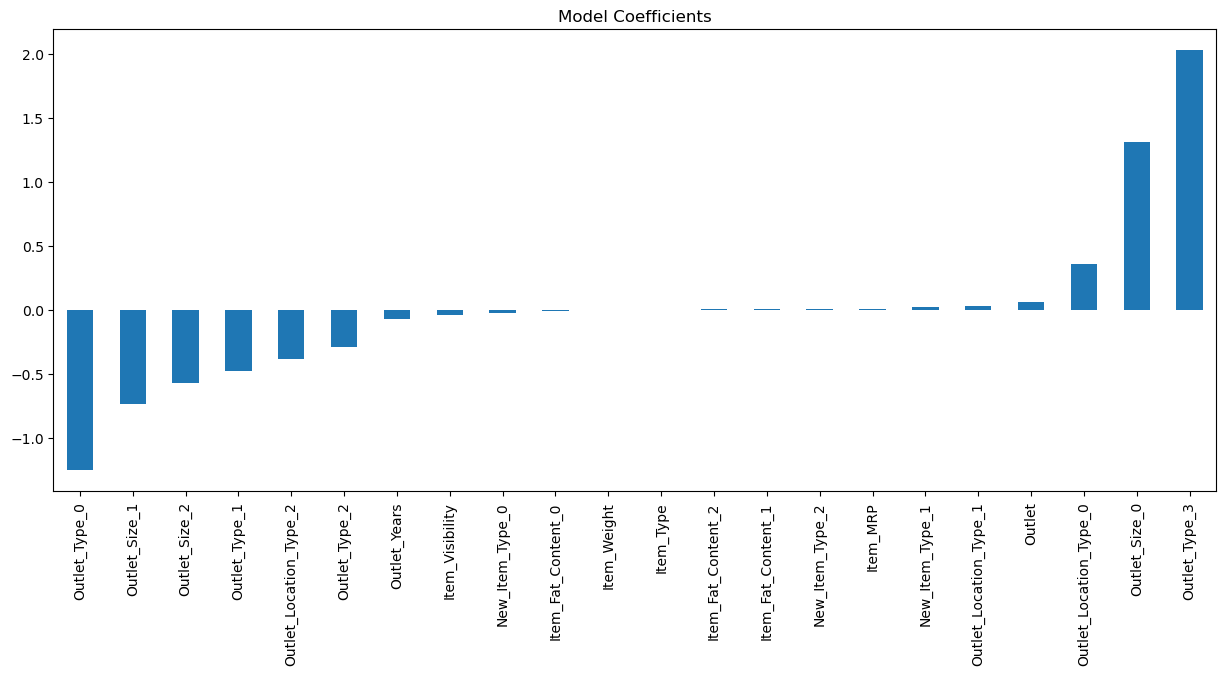

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients") 
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.29238814 -0.27407605 -0.28692116 -0.2845842  -0.28181722]
ABS Average of - neg_mean_squared_error 0.28395735306240055

R2 Score 
[0.69568991 0.73158949 0.71589546 0.73456312 0.72757229]
Average R2 Score  0.721062053746391

Accuracy for full Data
R2_Score: 0.7230903473757462



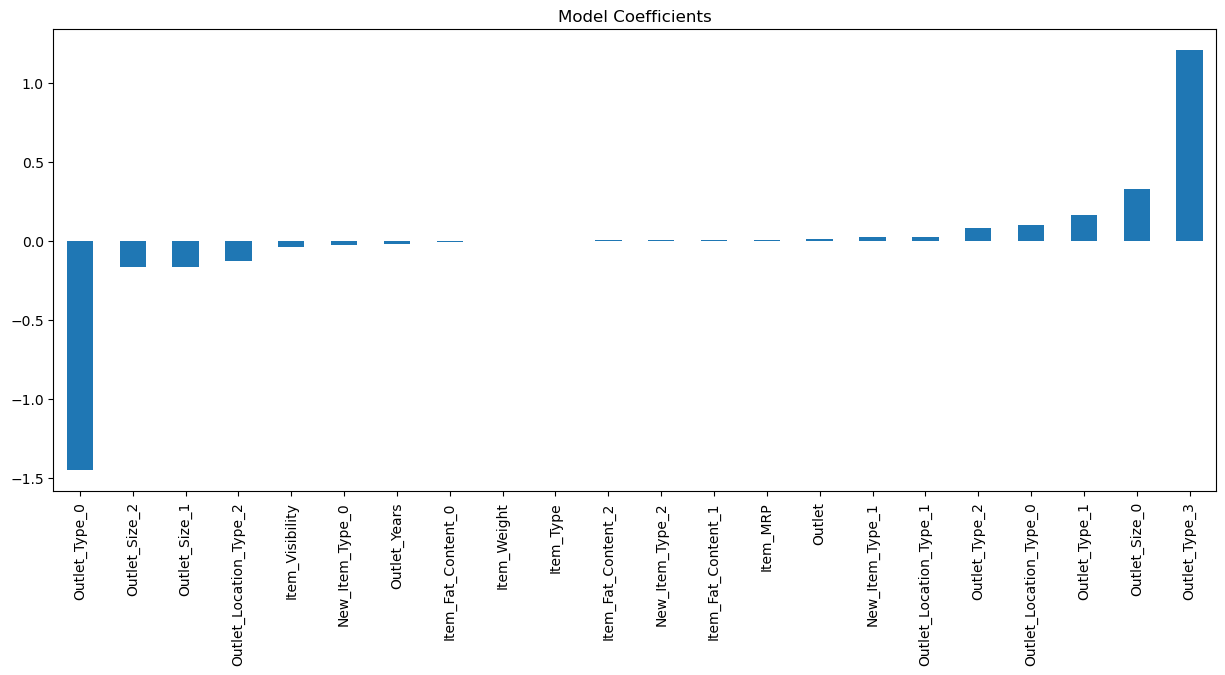

In [69]:
model = Ridge()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.72314998 -0.75701947 -0.75847666 -0.74093272 -0.78787083]
ABS Average of - neg_mean_squared_error 0.7534899315973709

R2 Score 
[0.24736402 0.25862917 0.24896908 0.30891853 0.23837923]
Average R2 Score  0.2604520071591053

Accuracy for full Data
R2_Score: 0.26227683517122646



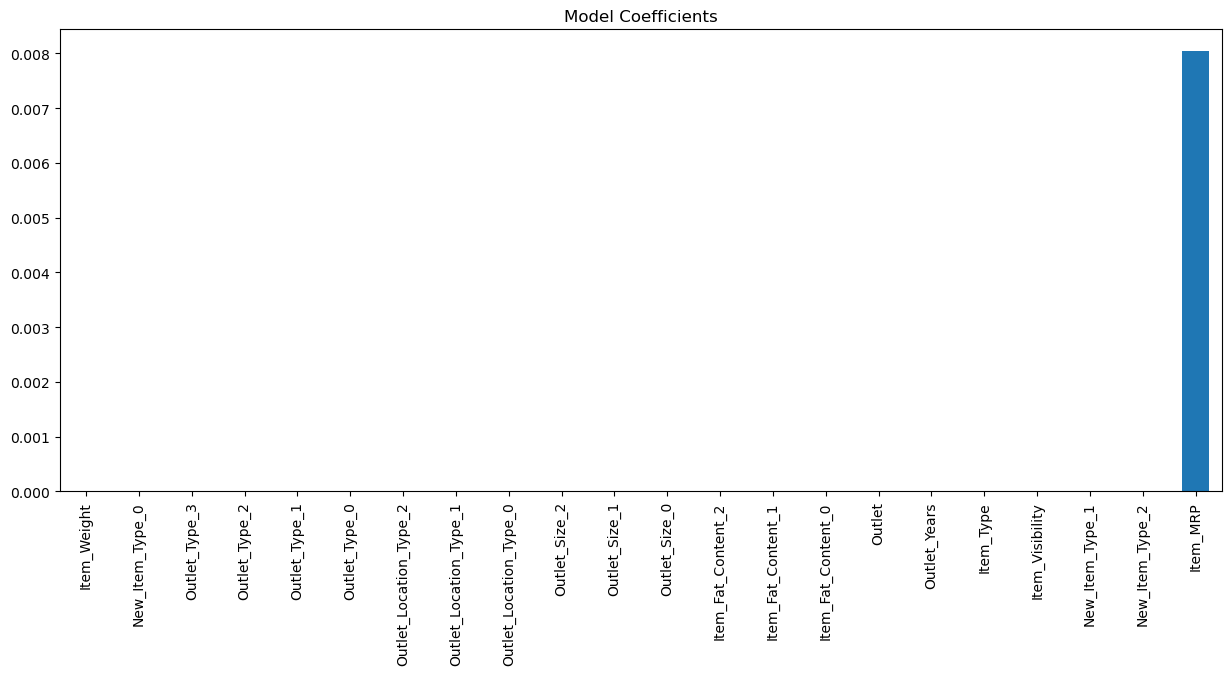

In [70]:
model = Lasso()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.56611439 -0.56564693 -0.52891255 -0.53976829 -0.54919566]
ABS Average of - neg_mean_squared_error 0.5499275663942054

R2 Score 
[0.42424387 0.45029951 0.47145586 0.4979241  0.4787047 ]
Average R2 Score  0.4645256064870328

Accuracy for full Data
R2_Score: 1.0



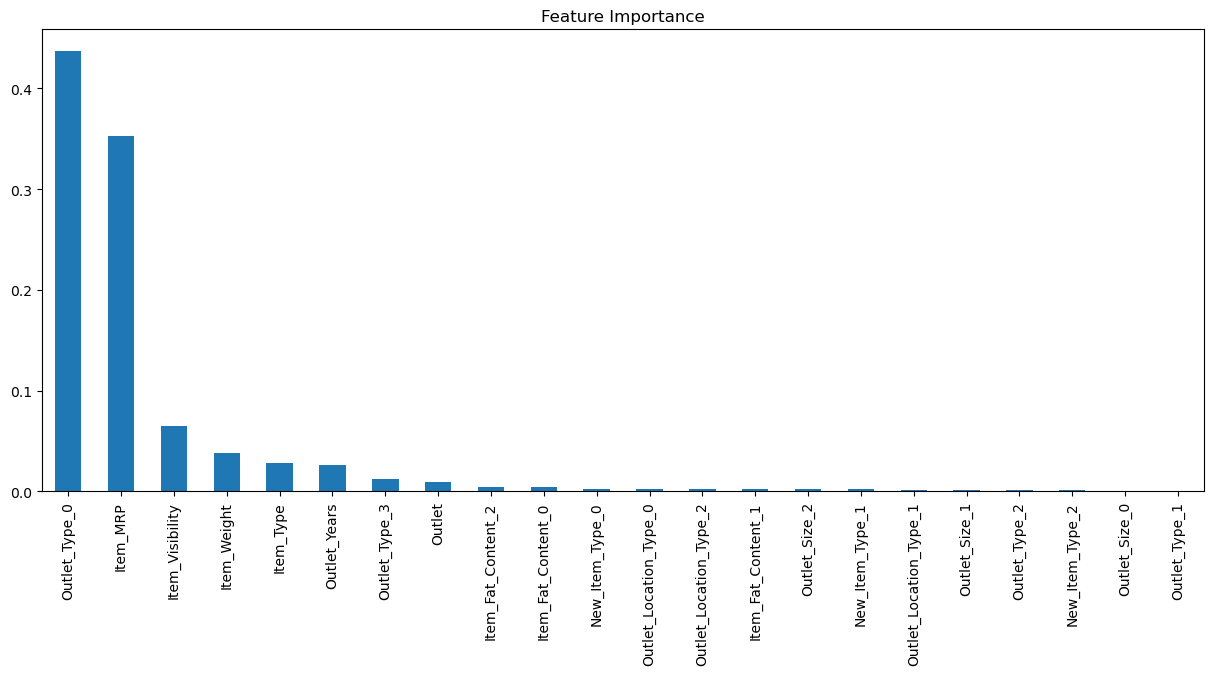

In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.30685227 -0.28690585 -0.30869609 -0.29177082 -0.29885618]
ABS Average of - neg_mean_squared_error 0.298616238875358

R2 Score 
[0.68106659 0.72023973 0.69627651 0.72597907 0.70851657]
Average R2 Score  0.7064156954629706

Accuracy for full Data
R2_Score: 0.9593821413714111



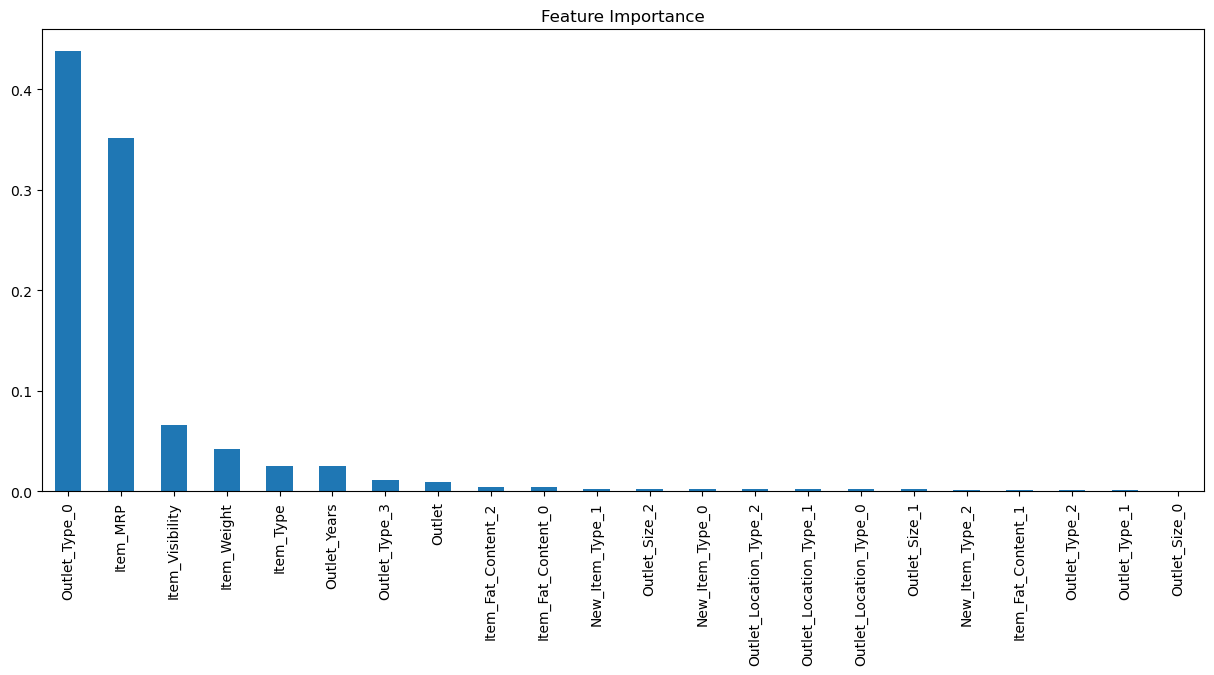

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.33314835 -0.31814522 -0.32333314 -0.32376456 -0.3208801 ]
ABS Average of - neg_mean_squared_error 0.32385427259907995

R2 Score 
[0.65360617 0.69345628 0.68068336 0.70293826 0.68528134]
Average R2 Score  0.683193081128929

Accuracy for full Data
R2_Score: 1.0



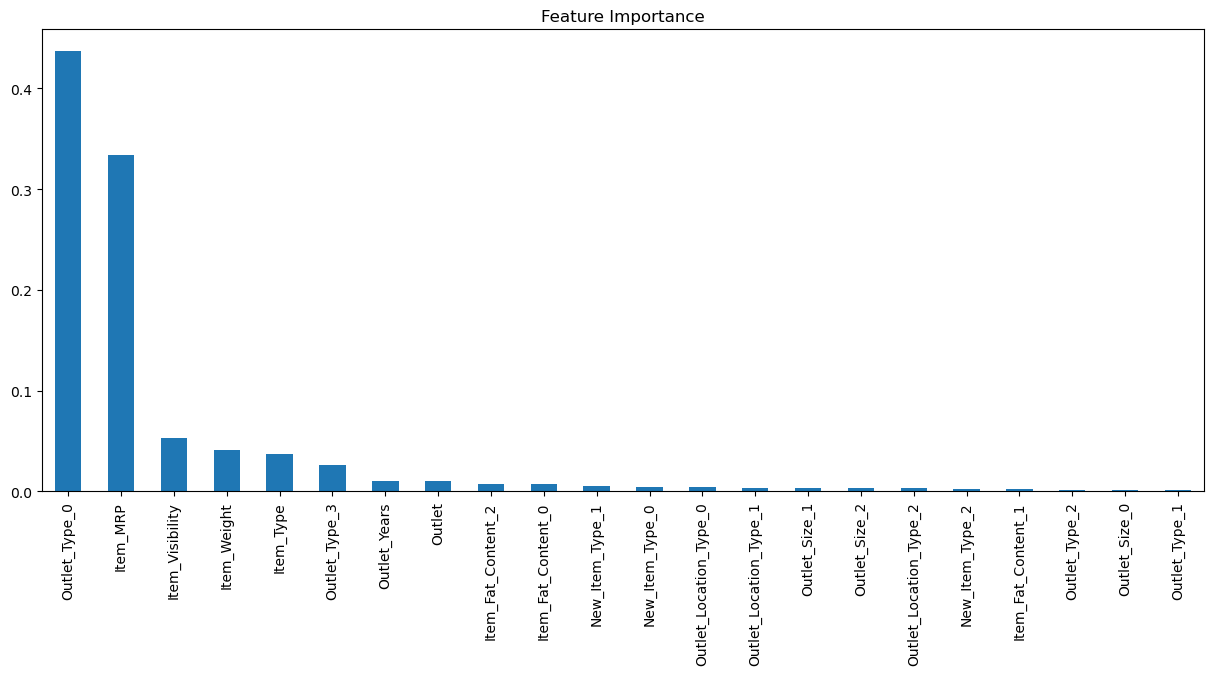

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

In [74]:
pip install lightgbm

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 22
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 22
[LightGBM] [Info] Start training from score 7.292207
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 22
[LightGBM] [Info] Start 

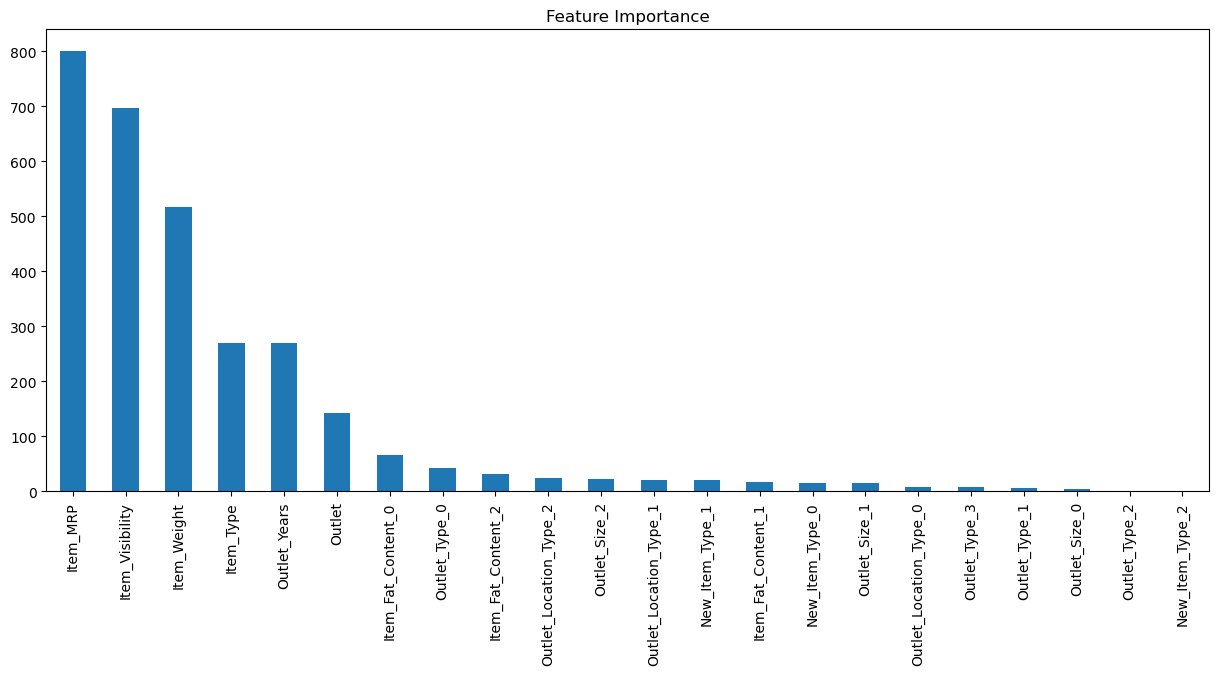

In [77]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

In [78]:
pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.4/70.9 MB 11.8 MB/s eta 0:00:06
                                              0.7/70.9 MB 8.4 MB/s eta 0:00:09
                                              1.0/70.9 MB 7.9 MB/s eta 0:00:09
                                              1.3/70.9 MB 6.9 MB/s eta 0:00:11
                                              1.6/70.9 MB 7.3 MB/s eta 0:00:10
     -                                        1.9/70.9 MB 6.8 MB/s eta 0:00:11
     -                                        2.2/70.9 MB 7.1 MB/s eta 0:00:10
     -                                        2.6/70.9 MB 6.8 MB/s eta 0:00:11
     -                                        2.9/70.9 MB 6.8 MB/s eta 0:00:11
     -                                        3.2/70.9 MB 6.8 MB/s eta 0:00:10
     -                                        3.5/70.9 MB 6.8 MB/s eta 0:00:10
     --                                       3.8/70.9 MB 

Model Report
Scoring - neg_mean_squared_error
[-0.31797058 -0.29325138 -0.3141655  -0.29825842 -0.3144247 ]
ABS Average of - neg_mean_squared_error 0.30761411557145063

R2 Score 
[0.66906436 0.71281054 0.68891857 0.72180893 0.69605122]
Average R2 Score  0.6977307221678791

Accuracy for full Data
R2_Score: 0.8984819392949467



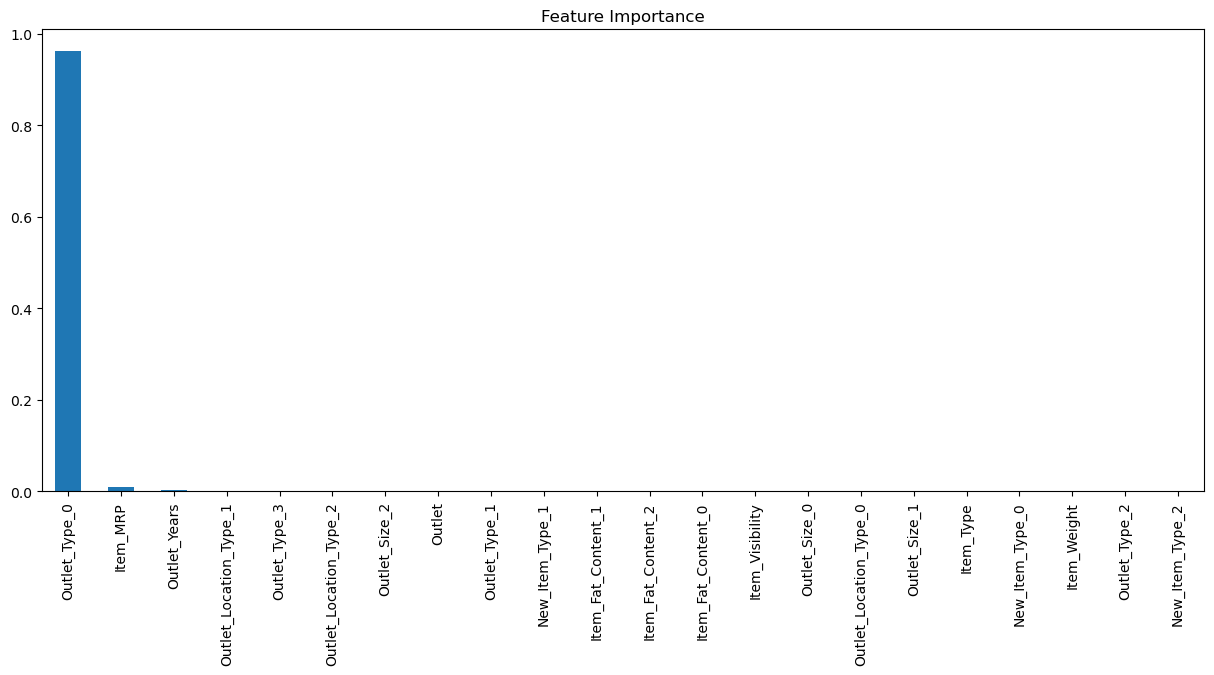

In [79]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [82]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
display (rf.fit(X_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   2.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   2.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   2.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   2.1s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)

{'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.26873725046056396


0.7262034622227699

array([7.7247614 , 7.58423539, 7.5329428 , ..., 7.46101236, 7.69249172,
       7.86126658])

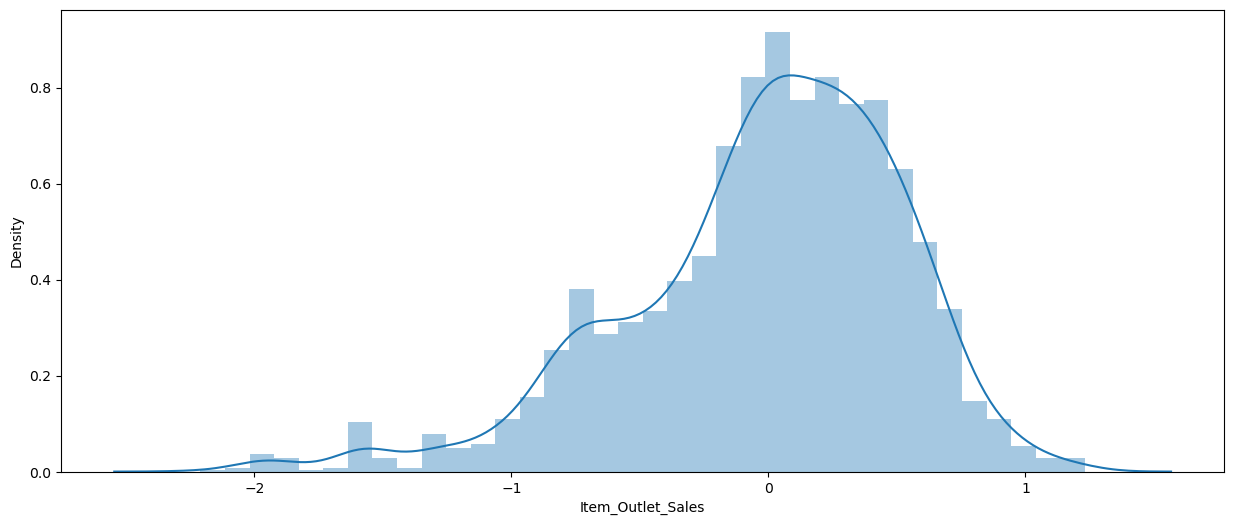

In [85]:
sns.distplot(y_test-predictions)
plt.show()

In [86]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [87]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 22
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002003D831790>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002003D8E1710>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002003D85E990>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002003D90EF10>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002003D880B90>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
print(lgb.best_params_)
print(lgb.best_score_)
predictions=lgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)

{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2706799492098526
[LightGBM] [Warning] Unknown parameter: gamma


0.7377914748603385

array([7.76971638, 7.39781933, 7.50890595, ..., 7.38685026, 7.7519031 ,
       7.85282338])

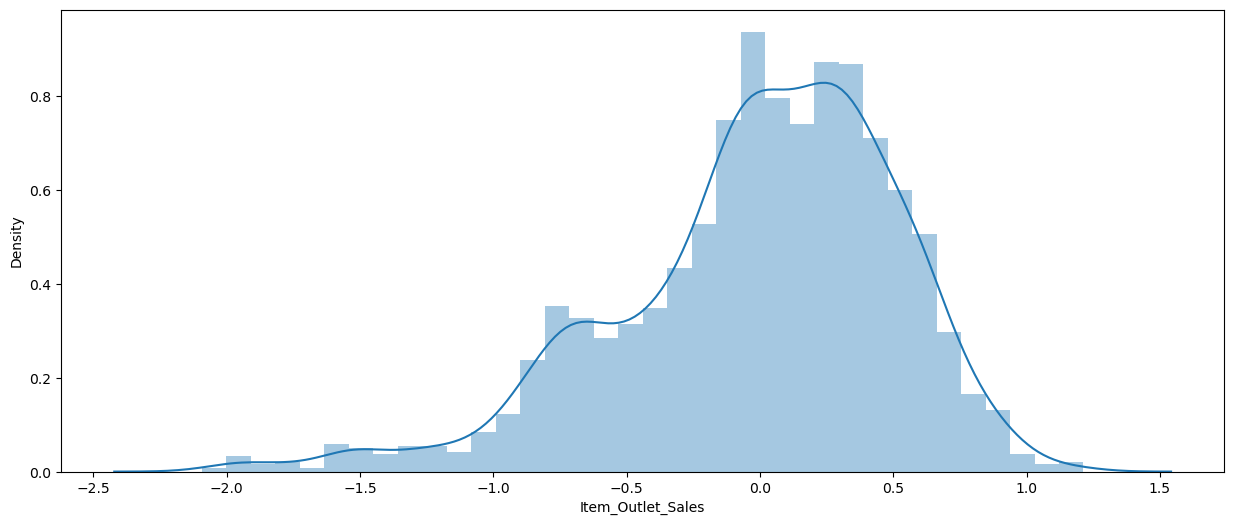

In [89]:
sns.distplot(y_test-predictions)
plt.show()

In [90]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [91]:
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.7s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002003D8627D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002003D87F690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002003D8786D0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002002BCD1450>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)

{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2704215862707118


0.7394955254610043

array([7.739384 , 7.4240503, 7.508462 , ..., 7.374793 , 7.7375946,
       7.8561153], dtype=float32)

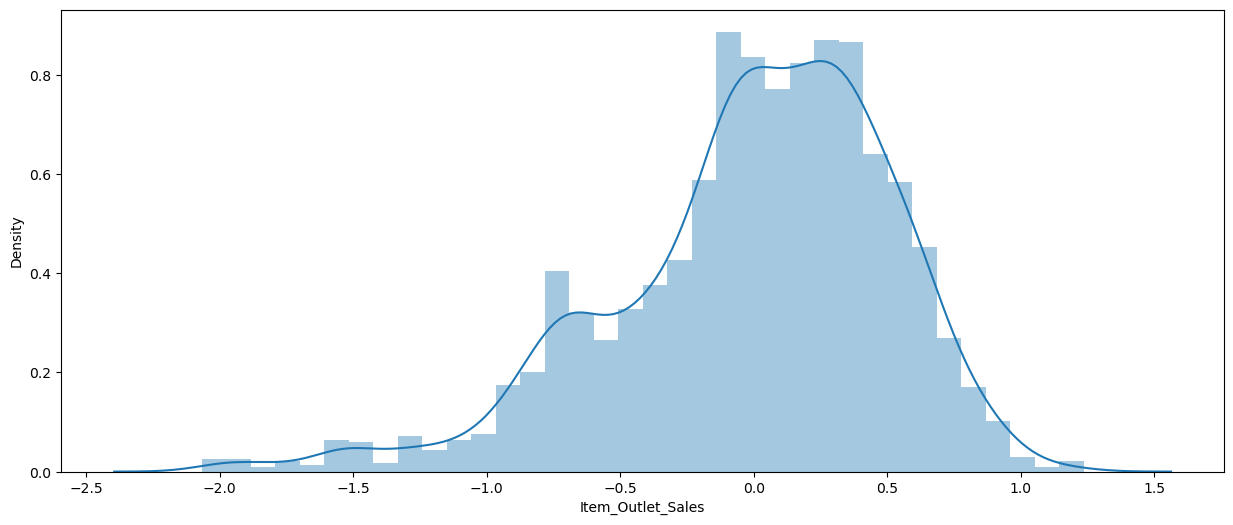

In [93]:
sns.distplot(y_test-predictions)
plt.show()